# Assignment

### dataset : https://drive.google.com/file/d/1HBOA5wHlTIs8qBYcwlseBqgU45jtGrVU/view?usp=drive_link

## Description:
In the dataset following columns are there, <br>

BUILDINGKEY: Building id	<br>
FLOORKEY: floor id<br>
FLOORNAME: floor name<br>
NURSEKEY: Ward id<br>
NURSENAME: Ward Name<br>
ROOMKEY: Room id <br>
ROOMNAME: Room Name <br>
BEDKEY: Bed id<br>
BEDNAME: Bed name<br>
BEDSTATUS: Bed status<br>
<br>
### Task
1. Get the Count of beds in each ward. <br>
2. Get the count of bed in each room.<br>
3. Get the count of the bed under each status.<br>
4. Calculate the overall occupancy percentage (total occupied / total bed).<br>
5. Calculate occupancy for each ward.<br>
6. Calculate occupancy for each room.<br>
7. Calculate count of bed with all the different bed statuses for each ward.<br>
8. Calculate count of bed with all the different bed statuses for each room.<br>

### Note
* In Room Name ignore the Room <number> part.<br>
* Preferred editor Jupyter Notebook/ Google Colab Notebook<br>



In [1]:
# questions?
# 1. is NURSEKEY and NURSENAME has one-to-one-relationship?
# 2. is ROOMKEY and ROOMNAME has one-to-one-relationship?
# 3. is BEDKEY and BEDNAME has one-to-one-relationship?
# 4. is the bed status `Occupied Discharge` is a single value?


In [2]:
# Task is solved considering, all the answer for each questions is "Yes"

##  Observations

In [3]:
# import dataset and perform clearning
import pandas as pd

def prepare_and_load_data(filepath):
    df = pd.read_csv(filepath)
    return df

filepath="dataset.csv"
df = prepare_and_load_data(filepath)
df

,BUILDINGKEY,FLOORKEY,FLOORNAME,NURSEKEY,NURSENAME,ROOMKEY,ROOMNAME,BEDKEY,BEDNAME,BEDSTATUS
0,5.0,9.0,First Floor NT,00:00.0,Daycare Surgery,33.0,Daycare NT (Day Care),34.0,101-1,Occupied Discharge
1,5.0,9.0,First Floor NT,00:00.0,Daycare Surgery,33.0,Daycare NT (Day Care),35.0,101-1P,Occupied Discharge
2,5.0,9.0,First Floor NT,00:00.0,Daycare Surgery,33.0,Daycare NT (Day Care),36.0,101-2,Vacant Dirty
3,5.0,9.0,First Floor NT,00:00.0,Daycare Surgery,33.0,Daycare NT (Day Care),37.0,101-2P,Vacant Dirty
4,5.0,9.0,First Floor NT,00:00.0,Daycare Surgery,33.0,Daycare NT (Day Care),38.0,101-3,Vacant Dirty
...,...,...,...,...,...,...,...,...,...,...
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['BUILDINGKEY', 'FLOORKEY', 'FLOORNAME', 'NURSEKEY', 'NURSENAME',
       'ROOMKEY', 'ROOMNAME', 'BEDKEY', 'BEDNAME', 'BEDSTATUS'],
      dtype='object')

In [5]:
# Number of Unique values in each columns
df.nunique()

BUILDINGKEY      3
FLOORKEY        13
FLOORNAME       13
NURSEKEY        27
NURSENAME       26
ROOMKEY        278
ROOMNAME       275
BEDKEY         685
BEDNAME        682
BEDSTATUS        6
dtype: int64

In [6]:
# why NURSEKEY count and NURSERNAME count is different.
rf = df.groupby('NURSENAME').NURSEKEY.nunique()
inconsistent_nursenames = rf[rf > 1]
inconsistent_nursenames

NURSENAME
Daycare Surgery    2
NT ICU             2
NT Ward 2D         2
Name: NURSEKEY, dtype: int64

In [7]:
nurse_names = ["NT ICU"] #  "Daycare Surgery", "NT ICU", "NT Ward 2D"
print(df[df["NURSENAME"].isin(nurse_names)][["NURSEKEY", "NURSENAME"]])


# observations
# 'Daycare Surgery' is having 00:00.0 and 32 (NURSEKEY)
# 'NT ICU' is having 00:00.0 and 59 (NURSEKEY)
# 'NT Ward 2D' is having 00:00.0 and 74 (NURSEKEY)

    NURSEKEY NURSENAME
25   00:00.0    NT ICU
26   00:00.0    NT ICU
27   00:00.0    NT ICU
28   00:00.0    NT ICU
29   00:00.0    NT ICU
30   00:00.0    NT ICU
31   00:00.0    NT ICU
32   00:00.0    NT ICU
710       59    NT ICU
711       59    NT ICU
712       59    NT ICU
713       59    NT ICU
714       59    NT ICU
715       59    NT ICU
716       59    NT ICU
717       59    NT ICU


In [8]:
# why ROOMKEY count and ROOMNAME count is different?
rf = df.groupby('ROOMNAME').ROOMKEY.nunique()
inconsistent_roomnames = rf[rf > 1]
inconsistent_roomnames

ROOMNAME
Room 522 (Double Bed)    2
Room 523 (Double Bed)    2
Room 524 (Double Bed)    2
Name: ROOMKEY, dtype: int64

In [9]:
room_list = ["Room 522 (Double Bed)", "Room 523 (Double Bed)", "Room 524 (Double Bed)"]
print(df[df["ROOMNAME"].isin(room_list)][["BUILDINGKEY", "FLOORKEY", "ROOMKEY", "ROOMNAME"]])

# OBSERVATIONS [ROOMNAME - ROOMKEY]
# 1. room 522 (double bed) - (811, 1639)
# 2. room 523 (double bed) - (812, 1640)
# 1. room 522 (double bed) - (813, 1641)

     BUILDINGKEY  FLOORKEY  ROOMKEY               ROOMNAME
615          6.0     461.0    811.0  Room 522 (Double Bed)
616          6.0     461.0    812.0  Room 523 (Double Bed)
617          6.0     461.0    813.0  Room 524 (Double Bed)
619          6.0     461.0   1639.0  Room 522 (Double Bed)
620          6.0     461.0   1639.0  Room 522 (Double Bed)
621          6.0     461.0   1639.0  Room 522 (Double Bed)
622          6.0     461.0   1640.0  Room 523 (Double Bed)
623          6.0     461.0   1640.0  Room 523 (Double Bed)
624          6.0     461.0   1640.0  Room 523 (Double Bed)
625          6.0     461.0   1641.0  Room 524 (Double Bed)
626          6.0     461.0   1641.0  Room 524 (Double Bed)
627          6.0     461.0   1641.0  Room 524 (Double Bed)


In [10]:
# why BEDKEY count and BEDNAME count is different.
rf = df.groupby('BEDNAME').BEDKEY.nunique()
inconsistent_bednames = rf[rf > 1]
print(inconsistent_bednames)

BEDNAME
522-1E    2
523-1E    2
524-1E    2
Name: BEDKEY, dtype: int64


In [11]:
# check these duplicate values
bed_list = ["522-1E", "523-1E", "524-1E"]
print(df[df["BEDNAME"].isin(bed_list)][["BEDKEY", "BEDNAME"]])


# OBSERVATIONS [BEDNAME - BEDKEY]
# 1. 522-1E - (1522, 1656)
# 2.523-1E - (1523, 1659)
# 3. 524-1E - (1524, 1662)

     BEDKEY BEDNAME
615  1522.0  522-1E
616  1523.0  523-1E
617  1524.0  524-1E
621  1656.0  522-1E
624  1659.0  523-1E
627  1662.0  524-1E


## Cleaning of Data

#### Drop Null values from dataframe (inplace)

In [12]:
# drop the null rows of either NURSENAME, ROOMNAME, BEDNAME
df = df.dropna(subset=["NURSENAME", "ROOMNAME", "BEDNAME"])

#### CORRECT the data of NURSENAME vs NURSEKEY

<b> observations for NURSEKEY and NURSENAME </b>
1. 'Daycare Surgery' is having 00:00.0 and 32 (NURSEKEY) <br>
2. 'NT ICU' is having 00:00.0 and 59 (NURSEKEY) <br>
3. 'NT Ward 2D' is having 00:00.0 and 74 (NURSEKEY) <br>
   
<b> observations for ROOMKEY and ROOMNAME </b>
1. room 522 (double bed) - (811, 1639) <br>
2. room 523 (double bed) - (812, 1640) <br>
3. room 522 (double bed) - (813, 1641) <br>

<b> observations for BEDKEY and BEDNAME </b>
1. 522-1E - (1522, 1656) <br>
2. 523-1E - (1523, 1659) <br>
3. 524-1E - (1524, 1662) <br>

In [13]:
def update_column_values(df, filter_key, filter_value, update_column, updated_value):
    df.loc[df[filter_key] == filter_value, update_column] = updated_value
    return df

In [14]:
# update nursekey and nursename issue
df = update_column_values(df, "NURSENAME", "Daycare Surgery", "NURSEKEY", 32)
df = update_column_values(df, "NURSENAME", "NT ICU", "NURSEKEY", 59)
df = update_column_values(df, "NURSENAME", "NT Ward 2D", "NURSEKEY", 74)

In [15]:
# update ROOMKEY and ROOMNAME issue
df = update_column_values(df, "ROOMNAME", "Room 522 (Double Bed)", "ROOMKEY", 811)
df = update_column_values(df, "ROOMNAME", "Room 523 (Double Bed)", "ROOMKEY", 812)
df = update_column_values(df, "ROOMNAME", "Room 524 (Double Bed)", "ROOMKEY", 813)

In [16]:
#update bedkey vs bedname issue
df = update_column_values(df, "BEDNAME", "522-1E", "BEDKEY", 1522)
df = update_column_values(df, "BEDNAME", "523-1E", "BEDKEY", 1523)
df = update_column_values(df, "BEDNAME", "524-1E", "BEDKEY", 1524)

In [17]:
df.nunique()

BUILDINGKEY      3
FLOORKEY        13
FLOORNAME       13
NURSEKEY        26
NURSENAME       26
ROOMKEY        275
ROOMNAME       275
BEDKEY         682
BEDNAME        682
BEDSTATUS        6
dtype: int64

In [18]:
# import re
# def extract_bedtype_if_room(roomname):
#     if not isinstance(roomname, str):
#         return roomname  # Skip non-strings

#     # Match if string starts with "Room" (any suffix)
#     if roomname.strip().lower().startswith("room"):
#         # Extract what's inside parentheses
#         match = re.search(r'\((.*?)\)', roomname)
#         return match.group(1).strip() if match else ""
#     else:
#         return roomname
        
# # Remove Room Number from the ROOMNAME column
# df.loc[:, "ROOMNAME"] = df["ROOMNAME"].apply(extract_bedtype_if_room)
# df.tail(10)      

In [19]:
# save another copy of this cleaned dataset
# df.to_csv("cleaned_dataset.csv", index=False)

In [20]:
df.nunique()

BUILDINGKEY      3
FLOORKEY        13
FLOORNAME       13
NURSEKEY        26
NURSENAME       26
ROOMKEY        275
ROOMNAME       275
BEDKEY         682
BEDNAME        682
BEDSTATUS        6
dtype: int64

# Tasks

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

### 1. Get the Count of beds in each ward.

In [22]:
def count_beds_per_ward(df):
    return df.groupby('NURSENAME').BEDNAME.nunique()
count_beds_per_ward_data = count_beds_per_ward(df)
count_beds_per_ward_data

NURSENAME
Daycare Endoscopy               32
Daycare Haemato & Onco Adult    35
Daycare Haemato & Onco Paed     11
Daycare Imaging                 10
Daycare Surgery                 25
NT Admission Lounge             18
NT ICU                           8
NT Labour Room                  21
NT NICU                          4
NT Nursery                      59
NT Paed HDU                      8
NT Ward 2D                      55
NT Ward 3D                      39
NT Ward 4D                      38
NT Ward 5C                      25
NT Ward 5D                      26
ST CCU                          11
ST HDU                           6
ST ICU                           9
ST Ward 2A                      30
ST Ward 3A                      31
ST Ward 3B                      45
ST Ward 4A                      45
ST Ward 4B                      33
ST Ward 5A                      35
ST Ward 5B                      26
Name: BEDNAME, dtype: int64

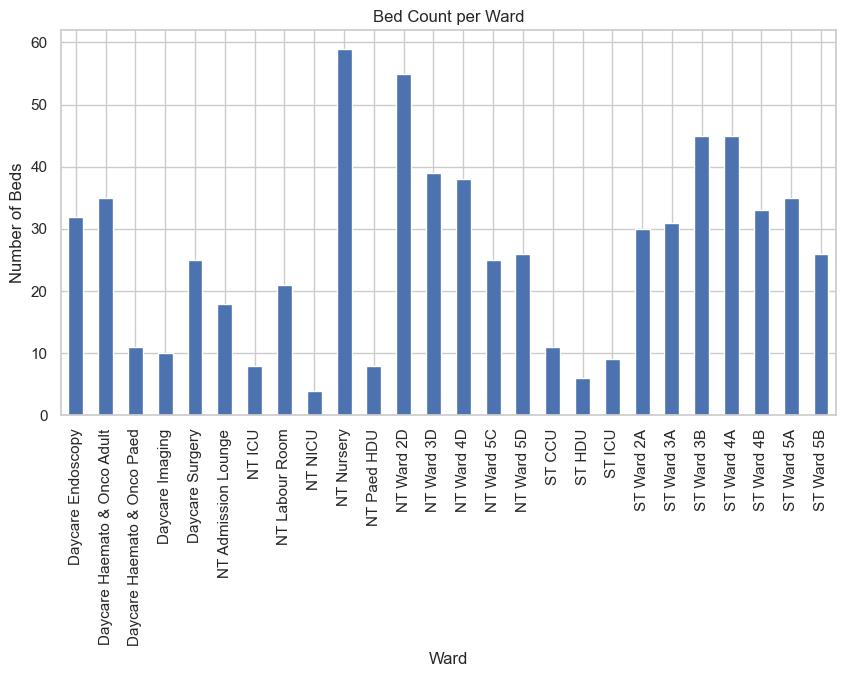

In [23]:
def plot_beds_per_ward(data):
    data.plot(kind='bar', figsize=(10, 5), title='Bed Count per Ward')
    plt.ylabel("Number of Beds")
    plt.xlabel("Ward")
    plt.show()
plot_beds_per_ward(count_beds_per_ward_data)

### 2. get the count of bed in each room

In [24]:
def count_beds_per_room(df):
    return df.groupby('ROOMNAME').BEDNAME.nunique()
count_beds_per_room_data = count_beds_per_room(df)


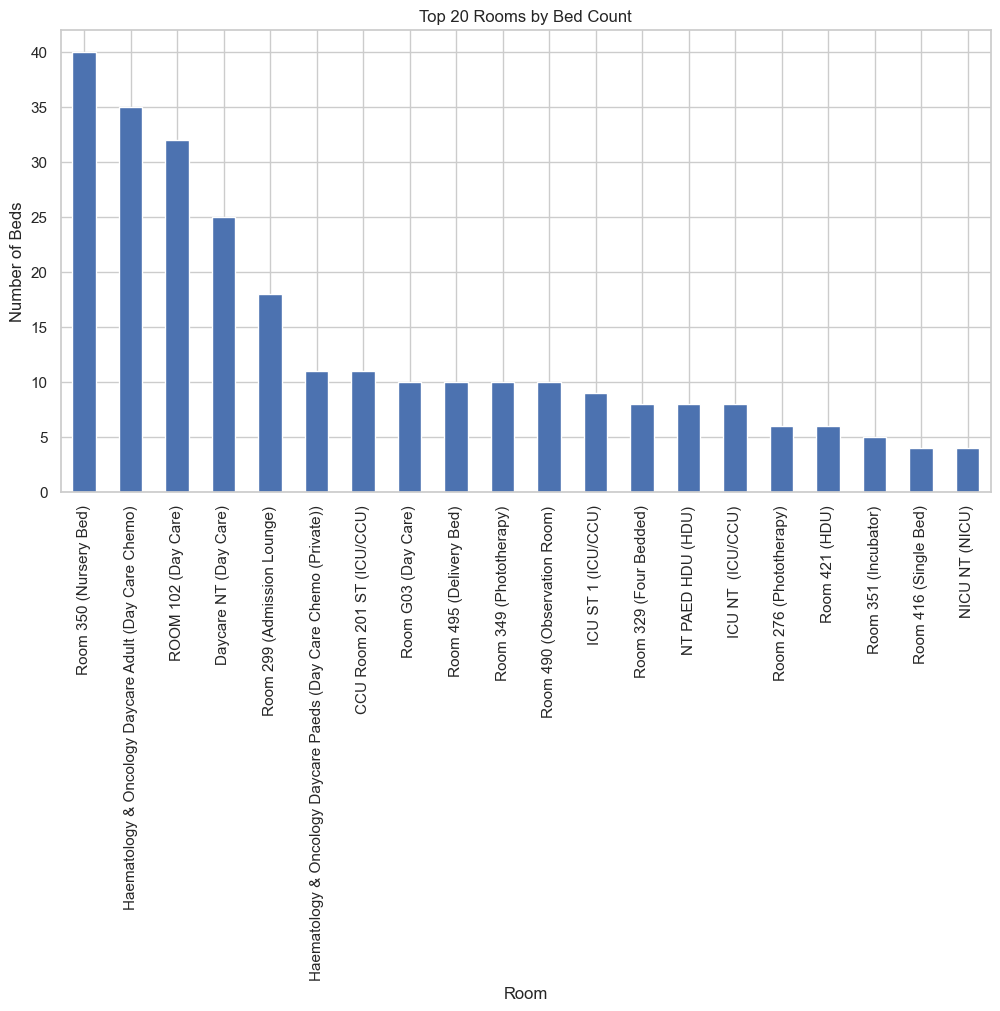

In [25]:
def plot_beds_per_room(data):
    data = data.sort_values(ascending=False).head(20)
    data.plot(kind='bar', figsize=(12, 6), title='Top 20 Rooms by Bed Count')
    plt.ylabel("Number of Beds")
    plt.xlabel("Room")
    plt.show()
plot_beds_per_room(count_beds_per_room_data)

### 3. Get the count of the bed under each status

In [26]:
# 3. Get the count of the bed under each status.
def count_beds_by_each_bed_status(df):
    return df.BEDSTATUS.value_counts()
    
count_beds_by_each_bed_status_data = count_beds_by_each_bed_status(df)
count_beds_by_each_bed_status_data

BEDSTATUS
Available             527
Vacant Dirty          210
Occupied(Female)      104
Occupied(Male)         90
Occupied Discharge     59
Blocked                 2
Name: count, dtype: int64

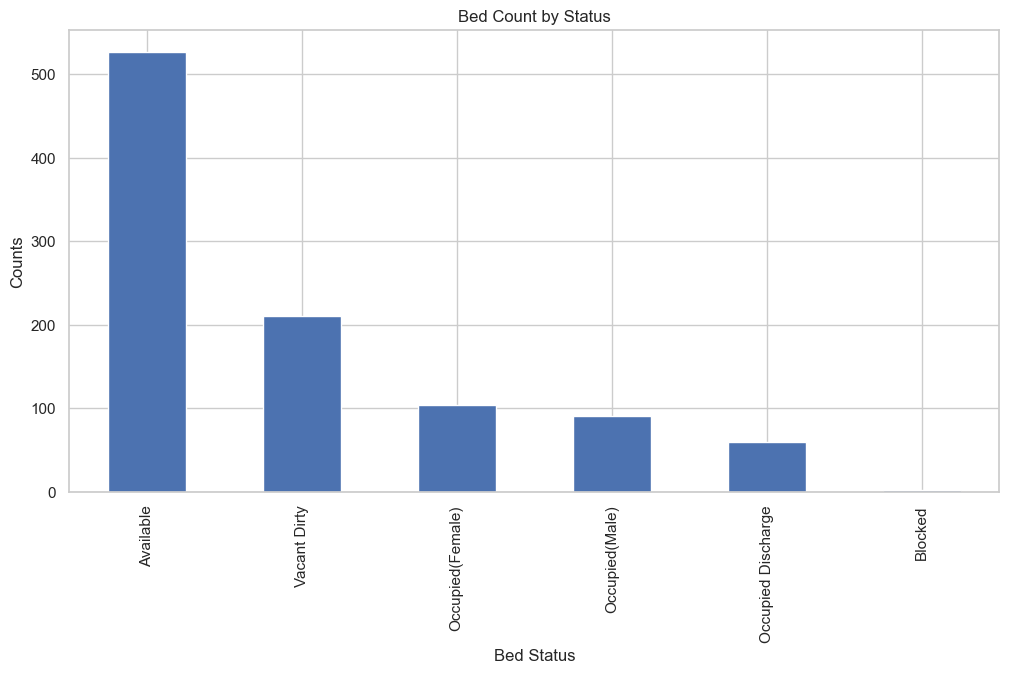

In [27]:
def plot_beds_by_bed_status(data):
    data.plot(kind="bar", figsize=(12, 6), title="Bed Count by Status")
    plt.xlabel("Bed Status")
    plt.ylabel("Counts")
    plt.show()
plot_beds_by_bed_status(count_beds_by_each_bed_status_data)

### 4. Calculate the overall occupancy percentage (total occupied / total bed)

In [28]:
def overall_occupancy(df):
    total_bed_count = len(df)
    occupied_bed_count = len(df[df["BEDSTATUS"].str.contains("Occupied", case=False)])
    occupancy_percent = occupied_bed_count * 100 / total_bed_count
    return occupancy_percent
overall_occupancy(df)

25.504032258064516

### 5. Calculate occupancy for each ward

In [29]:
def occupancy_for_each_ward(df):
    ward_status = df.groupby(["NURSEKEY", "BEDSTATUS"])["BEDNAME"].count()
    occupied_bed_count_per_ward = len(ward_status[ward_status["BEDSTATUS"].str.contains("Occupied", case=False)])

In [31]:
def occupancy_for_each_ward(df):
    # Group by NURSEKEY and BEDSTATUS, and count BEDNAME
    ward_status = df.groupby(["NURSENAME", "BEDSTATUS"])["BEDNAME"].count().reset_index()

    # Filter rows where BEDSTATUS contains 'Occupied'
    occupied_only = ward_status[ward_status["BEDSTATUS"].str.contains("Occupied", case='False')]
    
    # Group again by NURSENAME to get total occupied beds per ward
    occupied_bed_count_per_ward = occupied_only.groupby("NURSENAME")["BEDNAME"].sum()

    return occupied_bed_count_per_ward
occupancy_for_each_ward(df)

NURSENAME
Daycare Endoscopy                6
Daycare Haemato & Onco Adult     2
Daycare Surgery                  4
NT ICU                          10
NT NICU                          4
NT Nursery                       2
NT Ward 2D                      32
NT Ward 3D                      42
NT Ward 4D                      12
NT Ward 5D                      28
ST CCU                           7
ST HDU                           4
ST ICU                           5
ST Ward 2A                      17
ST Ward 3A                      27
ST Ward 3B                       5
ST Ward 4A                      12
ST Ward 4B                       3
ST Ward 5A                      20
ST Ward 5B                      11
Name: BEDNAME, dtype: int64

### 6. Calculate occupancy for each room.

In [32]:
def occupancy_for_each_room(df):
    # Group by ROOMNAME and BEDSTATUS, count BEDNAME
    room_status = df.groupby(["ROOMNAME", "BEDSTATUS"])["BEDNAME"].count().reset_index()
    
    # Filter only rows where BEDSTATUS contains "Occupied"
    occupied_only = room_status[room_status["BEDSTATUS"].str.contains("Occupied", case=False)]
    
    # Group by ROOMNAME and sum the occupied bed counts
    occupied_bed_count_per_room = occupied_only.groupby("ROOMNAME")["BEDNAME"].sum()
    
    return occupied_bed_count_per_room
occupancy_for_each_room(df)

ROOMNAME
CCU Room 201 ST (ICU/CCU)                                 7
Daycare NT (Day Care)                                     4
Haematology & Oncology Daycare Adult (Day Care Chemo)     2
ICU NT  (ICU/CCU)                                        10
ICU ST 1 (ICU/CCU)                                        5
                                                         ..
Room 582 (Single Bed)                                     2
Room 584 (Four Bedded)                                    1
Room 585 (Double Bed)                                     1
Room 586 (Double Bed)                                     1
Room 587 (Double Bed)                                     1
Name: BEDNAME, Length: 145, dtype: int64

### 7. Calculate count of bed with all the different bed statuses for each ward.

In [33]:
def bed_status_count_per_ward(df):
    # Group by NURSENAME and BEDSTATUS, and count the number of beds
    ward_status = df.groupby(["NURSENAME", "BEDSTATUS"])["BEDNAME"].count().reset_index()
    
    # Pivot the table to get BEDSTATUS as columns
    ward_status_pivot = ward_status.pivot(index="NURSENAME", columns="BEDSTATUS", values="BEDNAME").fillna(0).astype(int)
    
    return ward_status_pivot
bed_status_count_per_ward(df)

BEDSTATUS,Available,Blocked,Occupied Discharge,Occupied(Female),Occupied(Male),Vacant Dirty
NURSENAME,,,,,,
Daycare Endoscopy,16,0,6,0,0,10
Daycare Haemato & Onco Adult,3,0,2,0,0,30
Daycare Haemato & Onco Paed,2,0,0,0,0,9
Daycare Imaging,4,0,0,0,0,6
Daycare Surgery,12,0,4,0,0,34
NT Admission Lounge,26,0,0,0,0,2
NT ICU,6,0,0,8,2,0
NT Labour Room,42,0,0,0,0,0
NT NICU,4,0,0,2,2,0


### 8. Calculate count of bed with all the different bed statuses for each room.

In [35]:
def bed_status_count_per_room(df):
    # Group by ROOMNAME and BEDSTATUS, count the number of beds
    room_status = df.groupby(["ROOMNAME", "BEDSTATUS"])["BEDNAME"].count().reset_index()

    # Pivot the table to get BEDSTATUS values as columns
    room_status_pivot = room_status.pivot(index="ROOMNAME", columns="BEDSTATUS", values="BEDNAME").fillna(0).astype(int)

    return room_status_pivot
bed_status_count_per_room(df)

BEDSTATUS,Available,Blocked,Occupied Discharge,Occupied(Female),Occupied(Male),Vacant Dirty
ROOMNAME,,,,,,
CCU Room 201 ST (ICU/CCU),4,0,0,1,6,0
Daycare NT (Day Care),12,0,4,0,0,34
Haematology & Oncology Daycare Adult (Day Care Chemo),3,0,2,0,0,30
Haematology & Oncology Daycare Paeds (Day Care Chemo (Private)),2,0,0,0,0,9
ICU NT (ICU/CCU),6,0,0,8,2,0
...,...,...,...,...,...,...
Room 585 (Double Bed),0,0,0,1,0,1
Room 586 (Double Bed),0,0,0,1,0,1
Room 587 (Double Bed),0,0,0,1,0,1
